In [583]:
%cd C:\Codes\QIQSS-CODE\Code_Pulse
%cd C:\Users\dphy-dupontferrielab\Documents\Alexis_Test
%run -i PulseBuilder/pulse_v3.py

C:\Codes\QIQSS-CODE\Code_Pulse
C:\Users\dphy-dupontferrielab\Documents\Alexis_Test


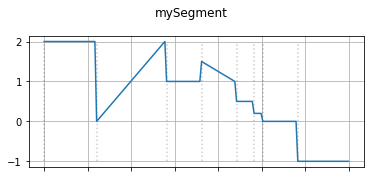

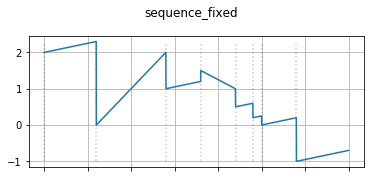

In [591]:
## Unit tests ##

# Test Constant(AtomSegment)
cst = Constant('cst', 2, 3)
assert cst.get('value') == 2
assert cst.get('duration') == 3
assert cst.getArea() == 6
assert np.array_equal(cst.getWave(10), np.full(30,2))

# Test Ramp(AtomSegment)
rmp = Ramp('rmp', (0,2), 4)
assert rmp.get('start') == 0
assert rmp.get('finish') == 2
assert rmp.get('duration') == 4
assert rmp.getArea() == 4
assert np.array_equal(rmp.getWave(13), np.linspace(0,2,4*13))

# Test AtomSegment.set
rmp.set('start', 1)
rmp.set('duration', 10)
assert rmp.get('start') == 1
assert rmp.get('duration') == 10
rmp.set('start', 0)
rmp.set('duration', 4)

# Test Segment
seg = Segment('mySegment')
seg.insert(cst, rmp)
seg.insertNew(Constant, 1, 2, 'constant')
seg.insertNew(Ramp, (1.5, 1), 2)

assert seg.get('cst') == cst
assert seg.get('rmp') == rmp
assert seg.get('constant').get('value') == 1
assert seg.get('constant').get('duration') == 2
assert seg.get('ramp_0').get('start') == 1.5
assert seg.get('ramp_0').get('finish') == 1
assert seg.get('ramp_0').get('duration') == 2

seg.insertStep([0.5,0.2,0,-1], [1, 0.5, 2, 3],['','this_one','',''])

assert seg.get('this_one').get('value') == 0.2
assert seg.getDuration() == 3+4+2+2+1+0.5+2+3

pulseDraw(seg, 10, vert_lines=True, no_marks=True)

seq = seg.makeSequence(1, constant_slope=0.1)
pulseDraw(seq, 100, vert_lines=True, no_marks=True)

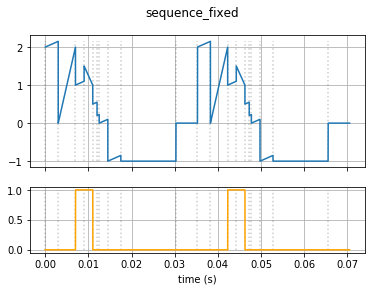

In [585]:
seg.mark('constant')
seg.mark('ramp_0')
seq = seg.makeSequence(2, compensate=-1, wait_time=5, constant_slope=0.05)
pulseDraw(seq, 1000, vert_lines=True)

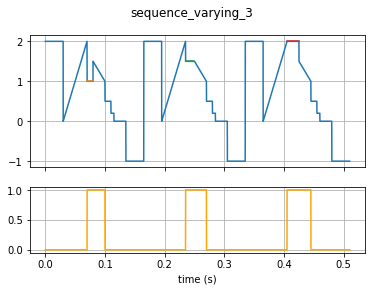

In [586]:
seq = seg.makeVaryingSequence(3, ['constant', 'constant'], ['duration', 'value'], [(1,2),(1,2)])
pulseDraw(seq, 100, highlight_atoms=[('constant',None)])